In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Get Data

In [0]:
from keras.preprocessing.image import ImageDataGenerator

path_to_folder = "/content/drive/My Drive/Colab Notebooks/Malaria"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(path_to_folder+'/cell_images/train',
                                                    target_size=(100,100),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(path_to_folder+'/cell_images/test',
                                                    target_size=(100,100),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 24803 images belonging to 2 classes.
Found 2755 images belonging to 2 classes.


# Train Model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


classifier = Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(100,100,3),activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=128,activation='relu'))

classifier.add(Dense(units=1,activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit_generator(train_generator,
                        steps_per_epoch=100,
                        nb_epoch=1,
                        validation_data=validation_generator,
                        validation_steps=10)



Found 24773 images belonging to 2 classes.
Found 2755 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=100, validation_data=<keras_pre..., validation_steps=10, epochs=1)`


Epoch 1/1
  3/100 [..............................] - ETA: 12:08 - loss: 2.7573 - acc: 0.5000

# Use Model

Would you like it to randomly pick an image? yes


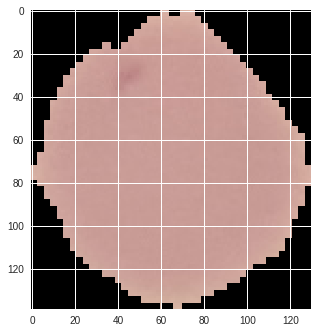

Uninfected
True
Press Enter to continue...







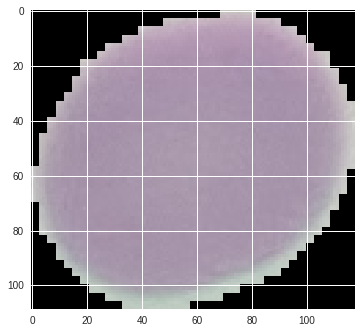

Uninfected
True
Press Enter to continue...







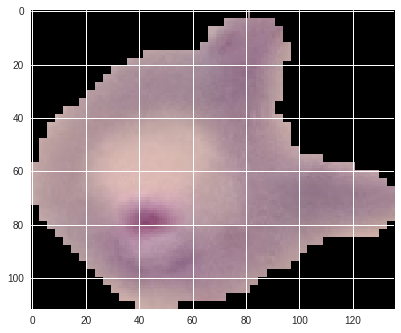

Uninfected
False
Press Enter to continue...







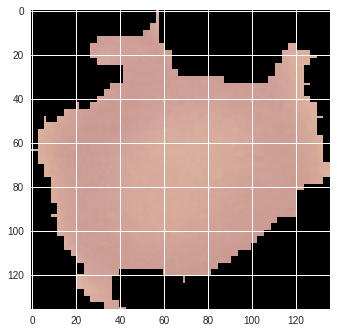

Uninfected
True
Press Enter to continue...







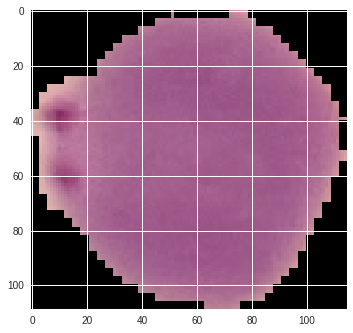

Parasitized
True
Press Enter to continue...







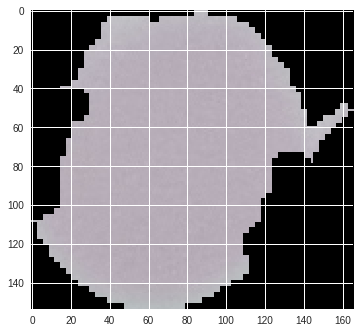

Uninfected
True
Press Enter to continue...







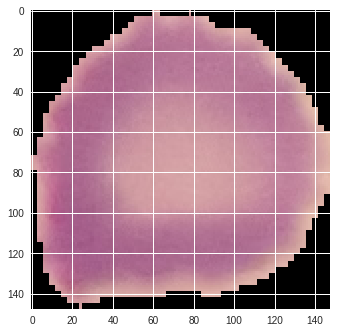

Uninfected
True
Press Enter to continue...







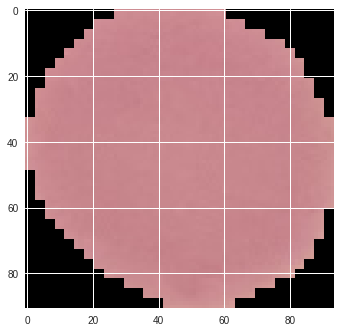

Uninfected
True
Press Enter to continue...







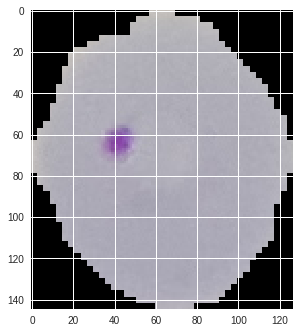

Parasitized
True
Press Enter to continue...







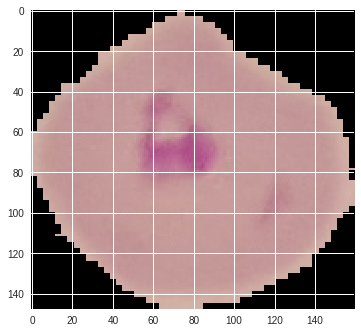

Parasitized
True
Press Enter to continue...







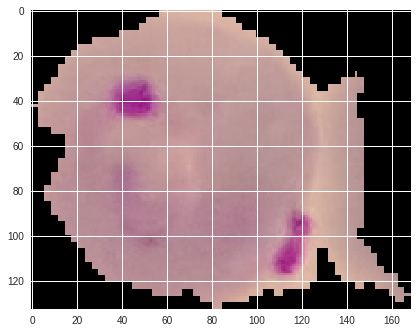

Parasitized
True
Press Enter to continue...







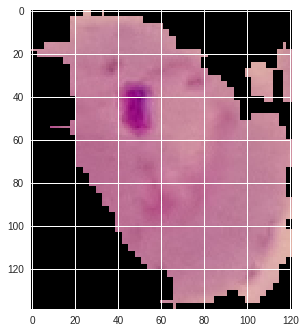

Parasitized
True
Press Enter to continue...







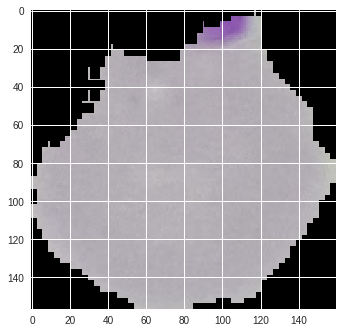

Parasitized
True
Press Enter to continue...







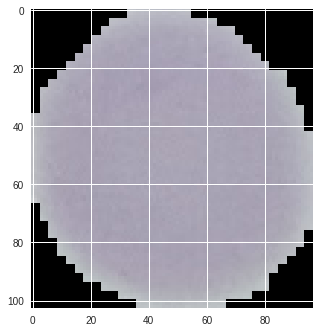

Uninfected
True
Press Enter to continue...







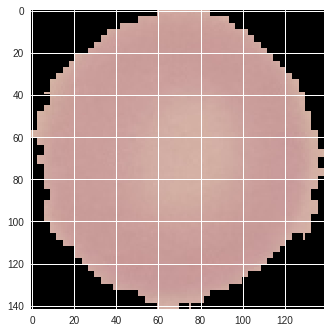

Uninfected
True
Press Enter to continue...







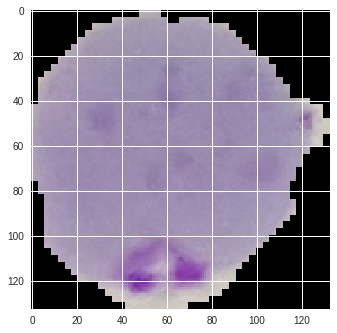

Parasitized
True
Press Enter to continue...







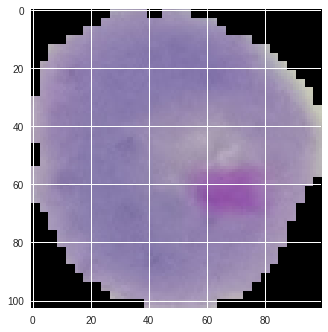

Parasitized
True
Press Enter to continue...







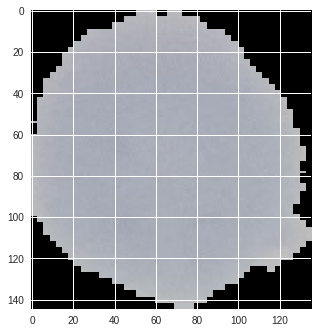

Uninfected
True
Press Enter to continue...







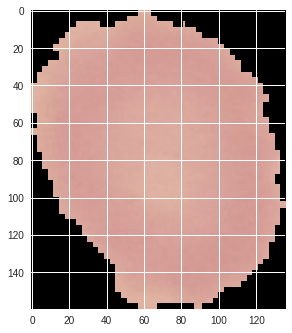

Uninfected
True
Press Enter to continue...







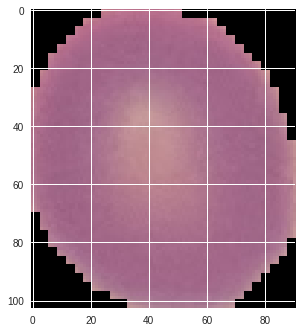

Uninfected
True
Press Enter to continue...







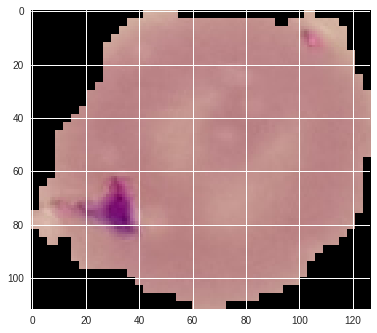

Parasitized
True
Press Enter to continue...







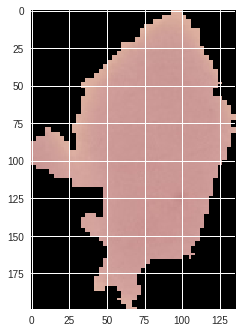

Uninfected
True
Press Enter to continue...







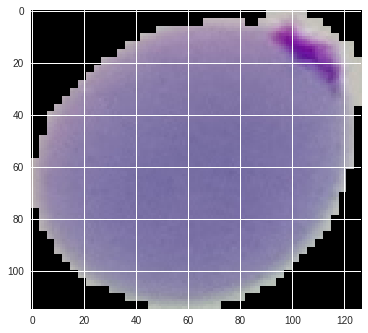

Parasitized
True
Press Enter to continue...







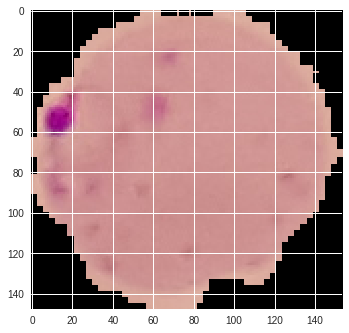

Parasitized
True
Press Enter to continue...







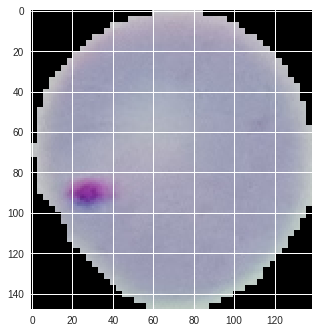

Parasitized
True
Press Enter to continue...







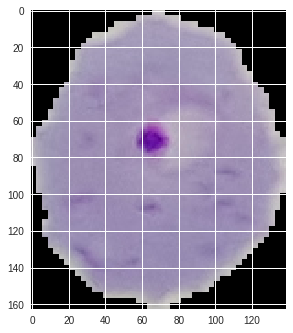

Parasitized
True
Press Enter to continue...







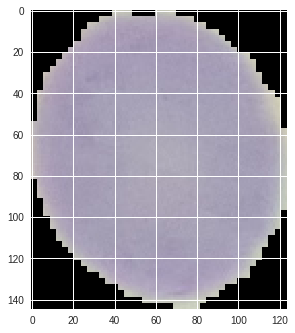

Uninfected
True
Press Enter to continue...







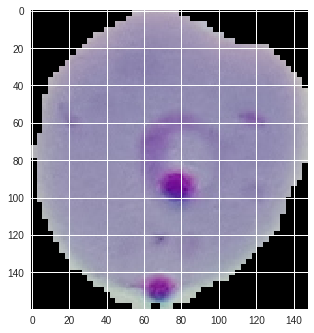

Parasitized
True
Press Enter to continue...







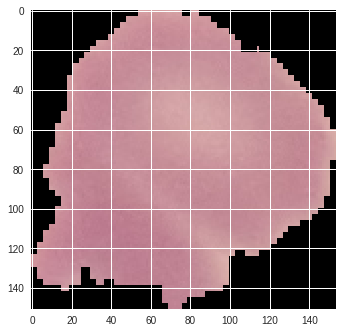

Uninfected
True
Press Enter to continue...







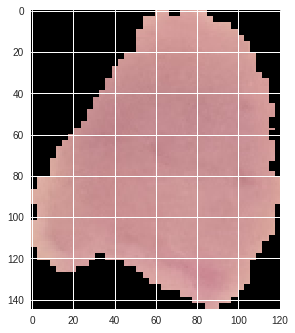

Uninfected
False


KeyboardInterrupt: ignored

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(100, 100))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

classifier = load_model(path_to_folder+"/classifier.h5")

chose_random=False

import random,os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if(input("Would you like it to randomly pick an image? ")=="yes"):
  chose_random=True

while (chose_random==False):
    new_image = input()

    new_image = load_image(new_image)

    classes=["Parasitized","Uninfected"]

    prediction = classifier.predict(new_image)

    pred = prediction[0][0]

    print(pred)
    
while (chose_random==True):
    answer = random.choice(["Parasitized","Uninfected"])
    
    path = path_to_folder+"/cell_images/test/"+answer
    
    file = random.choice(os.listdir(path))
    
    new_image = load_image(path+"/"+file)
    
    classes=["Parasitized","Uninfected"]

    prediction = classifier.predict(new_image)

    pred = classes[int(round(prediction[0][0],0))]
    
    img=mpimg.imread(path+"/"+file)
    imgplot = plt.imshow(img)
    plt.show()

    print(pred)
    
    print(pred==answer)
    
    input("Press Enter to continue...")
    
    print("\n\n\n\n")
    